Notebook para intentar imputar una edad a los pasajeros que tienen ese campo vacío.

In [128]:
# importo todas las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

In [129]:
data='./db/titanic/test.csv'
test = pd.read_csv(data , encoding='utf-8')

test.columns = [test.columns[i].lower() for i in range(len(test.columns))]
test.head(10)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [130]:
test[test.age.isna()]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Vemos que son 88 campos, separemos en clases.

In [131]:
test[(test.age.isna()) & (test.pclass==3)]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [132]:
df = test.drop(test[test.age.isna()].index, axis=0)

In [133]:
df

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


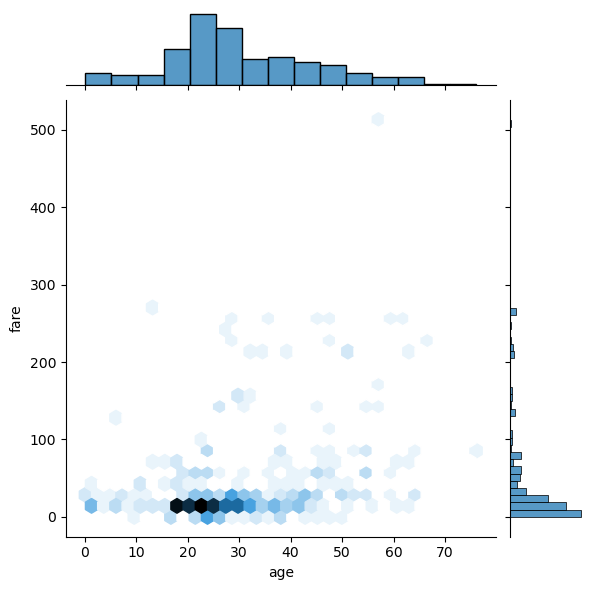

In [134]:
sns.jointplot(x = df['age'], y = df['fare'], kind = 'hex')

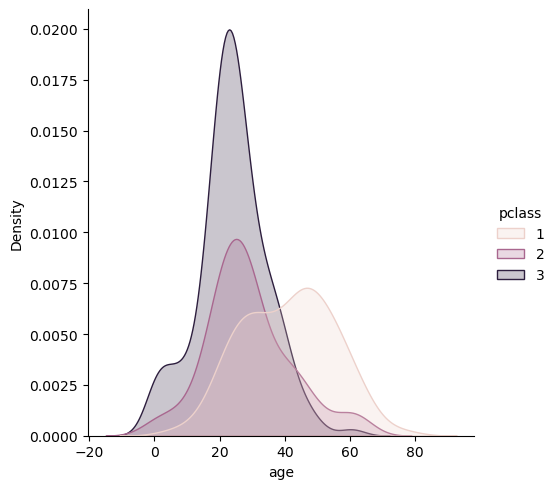

In [135]:
sns.displot(df, x="age", hue="pclass", kind="kde", fill=True)

In [136]:
df[df.pclass==1].age.describe()

count    98.000000
mean     40.918367
std      13.956799
min       6.000000
25%      30.000000
50%      42.000000
75%      50.750000
max      76.000000
Name: age, dtype: float64

In [137]:
df[df.pclass==2].age.describe()

count    88.000000
mean     28.777500
std      12.943458
min       0.920000
25%      21.000000
50%      26.500000
75%      35.250000
max      63.000000
Name: age, dtype: float64

In [138]:
df[df.pclass==3].age.describe()

count    146.000000
mean      24.027945
std       10.537105
min        0.170000
25%       18.500000
50%       24.000000
75%       29.750000
max       60.500000
Name: age, dtype: float64

In [139]:
test[(test.age.isna()) & (test.pclass==1)] 

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
146,1038,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
148,1040,1,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S
168,1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
191,1083,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S
205,1097,1,"Omont, Mr. Alfred Fernand",male,NaN,0,0,F.C. 12998,25.7417,NaN,C
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
290,1182,1,"Rheims, Mr. George Alexander Lucien",male,NaN,0,0,PC 17607,39.6000,NaN,S


In [146]:
test.loc[(test.age.isna()) & (test.pclass==1)] = test[(test.age.isna()) & (test.pclass==1)].fillna(test[test.pclass==1].age.mean(),inplace=False,axis=1)

In [149]:
test.loc[(test.age.isna()) & (test.pclass==2)] = test[(test.age.isna()) & (test.pclass==2)].fillna(test[test.pclass==2].age.mean(),inplace=False,axis=1)

In [152]:
test.loc[(test.age.isna()) & (test.pclass==3)] = test[(test.age.isna()) & (test.pclass==3)].fillna(test[test.pclass==3].age.mean(),inplace=False,axis=1)

In [155]:
test.age.isna().unique()

array([False])

In [156]:
test.to_csv('./db/titanic/test_with_age.csv',encoding='utf-8')